## Dataset: YELP.csv

In [93]:
# Importng Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

### 1. Read yelp.csv 

In [61]:
# importing DF
df = pd.read_csv("../Data/yelp.csv")
print(df.shape)
df.head()

(10000, 10)


,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [62]:
df["text_len"] = df["text"].apply(len)

In [63]:
#  get only 5 star reviews
df[df["stars"] == 5]

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_len
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565
...,...,...,...,...,...,...,...,...,...,...,...
9990,R8VwdLyvsp9iybNqRvm94g,2011-10-03,pcEeHdAJPoFNF23es0kKWg,5,Yes I do rock the hipster joints. I dig this ...,review,b92Y3tyWTQQZ5FLifex62Q,1,1,1,263
9991,WJ5mq4EiWYAA4Vif0xDfdg,2011-12-05,EuHX-39FR7tyyG1ElvN1Jw,5,Only 4 stars? \n\n(A few notes: The folks that...,review,hTau-iNZFwoNsPCaiIUTEA,1,1,0,908
9992,f96lWMIAUhYIYy9gOktivQ,2009-03-10,YF17z7HWlMj6aezZc-pVEw,5,I'm not normally one to jump at reviewing a ch...,review,W_QXYA7A0IhMrvbckz7eVg,2,3,2,1326
9994,L3BSpFvxcNf3T_teitgt6A,2012-03-19,0nxb1gIGFgk3WbC5zwhKZg,5,Let's see...what is there NOT to like about Su...,review,OzOZv-Knlw3oz9K5Kh5S6A,1,2,1,1968


### 2. Use FacetGrid from the seaborn library to create a grid of 5 histograms of text length based off of the star ratings. Reference the seaborn documentation for hints on this

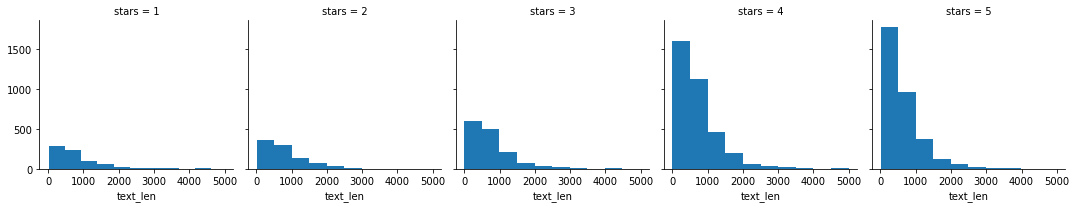

In [64]:
sns.FacetGrid(df,col="stars").map(plt.hist,"text_len")

### 3.Create a boxplot of text length for each star category

<AxesSubplot:xlabel='stars', ylabel='text_len'>

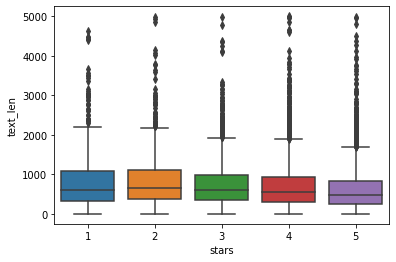

In [65]:
sns.boxplot(x = 'stars', y = 'text_len', data = df)

### 4. Create a countplot of the number of occurrences for each type of star rating.

<AxesSubplot:xlabel='stars', ylabel='count'>

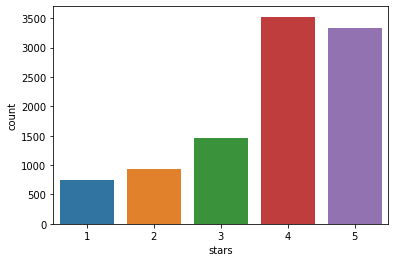

In [66]:
sns.countplot(x = 'stars', data = df)

### 5. Use groupby to get the mean values of the numerical columns.

In [67]:
stars = df.groupby('stars').mean()
stars

,cool,useful,funny,text_len
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


## Dataset: SMSSpamCollection

In [68]:
df_spam = pd.read_csv("../Data/SMSSpamCollection",sep = "\t",header=None)

In [69]:
df_spam.columns = ["Label","Text"]

### 1. Check the descriptive statistics.

In [70]:
# Data preprocessing
def count_words(text):
    return len(text.split(" "))

# extracting word counts
df_spam["Word Count"] = df_spam["Text"].apply(count_words)

# Extracting character counts
df_spam["Character Count"] = df_spam["Text"].apply(len)

In [71]:
# Encoding labels 
df_spam["Label"] = df_spam["Label"].astype("category")
df_spam["Label"] = df_spam["Label"].cat.codes

In [43]:
# descriptive stats
df_spam.describe()

,Label,Word Count,Character Count
count,5572.000000,5572.000000,5572.000000
mean,0.134063,15.709440,80.489950
std,0.340751,11.493753,59.942907
min,0.000000,1.000000,2.000000
25%,0.000000,7.000000,36.000000
50%,0.000000,12.000000,62.000000
75%,0.000000,23.000000,122.000000
max,1.000000,171.000000,910.000000


### 2. Report the descriptive statistics grouped by label.

In [44]:
# HAM
[df_spam["Label"] == 0].describe()

,Label,Word Count,Character Count
count,4825.0,4825.000000,4825.000000
mean,0.0,14.433161,71.482487
std,0.0,11.628301,58.440652
min,0.0,1.000000,2.000000
25%,0.0,7.000000,33.000000
50%,0.0,11.000000,52.000000
75%,0.0,19.000000,93.000000
max,0.0,171.000000,910.000000


In [45]:
# SPAM
df_spam[df_spam["Label"] == 1].describe()

,Label,Word Count,Character Count
count,747.0,747.000000,747.000000
mean,1.0,23.953146,138.670683
std,0.0,5.794904,28.873603
min,1.0,2.000000,13.000000
25%,1.0,22.000000,133.000000
50%,1.0,25.000000,149.000000
75%,1.0,28.000000,157.000000
max,1.0,35.000000,223.000000


### 3. Make a new column to compute how long the length of the text.

In [46]:
# Extracting character counts
df_spam["Character Count"] = df_spam["Text"].apply(len)

### 4. Check if message length is a distinguishing feature between ham and spam.

<BarContainer object of 5572 artists>

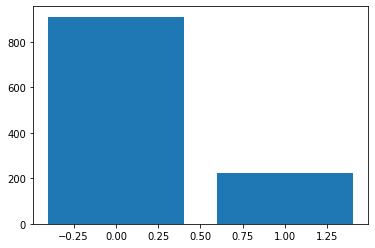

In [51]:
# Here we can see that ham mails are more in length
plt.bar(df_spam["Label"],df_spam["Character Count"])

### 5. Remove punctuations 

In [75]:
def remove_punct(text):
    s = text.translate(string.punctuation)
    return s

df_spam["Clean_Text"] = df_spam["Text"].apply(remove_punct)

### 6. Remove stopwords using nltk.corpus
### 7. Normalize the text by stemming.

In [76]:
# Stemming
ps = PorterStemmer()
# Initializing Lists
corpus = []
words = []
for i in range(0, len(df_spam)):
    # Removing characters other than letters
    review = re.sub('[^a-zA-Z]', ' ', str(df_spam["Clean_Text"][i]))
    # Lowering the case all the text
    review = review.lower()
    # Splitting into words
    review = review.split()
    # Applying Stemming
    stemmed = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    # Joining words
    review = ' '.join(stemmed)
    # Appending all tweets to a list after preprocessing
    corpus.append(review)
    # Appending all words for word embeddings
    words.append(stemmed)

### 8.Vectorisation : The messages are now as lists of tokens. Convert each of those messages into a vector.
### 9. Use Bag of words models

In [82]:
# Count Vectorizer
bow_transformer = CountVectorizer().fit(corpus)

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

6296


In [92]:
# Count Vetorizer
X = bow_transformer.fit_transform(corpus)
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
